In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号

In [59]:
df = pd.read_csv('data/DataAnalyst.csv', encoding='gb2312')
df.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 17 columns):
city                 6876 non-null object
companyFullName      6876 non-null object
companyId            6876 non-null int64
companyLabelList     6170 non-null object
companyShortName     6876 non-null object
companySize          6876 non-null object
businessZones        4873 non-null object
firstType            6869 non-null object
secondType           6870 non-null object
education            6876 non-null object
industryField        6876 non-null object
positionId           6876 non-null int64
positionAdvantage    6876 non-null object
positionName         6876 non-null object
positionLables       6844 non-null object
salary               6876 non-null object
workYear             6876 non-null object
dtypes: int64(2), object(15)
memory usage: 913.3+ KB


In [61]:
arr = df.salary.str.split('-')
arr_df = pd.DataFrame(arr.tolist(), columns=['bottom', 'top'])
arr_df['top'] = arr_df['top'].str[:]
arr_df['bottom'] = arr_df['bottom'].str[:]
arr_df.head()

,bottom,top
0,7k,9k
1,10k,15k
2,4k,6k
3,6k,8k
4,2k,3k


In [62]:
arr_df[arr_df['top'].isnull()].head()
arr_df.fillna(method='ffill', axis=1, inplace=True)
arr_df['top'] = arr_df['top'].apply(lambda s: s[0:s.find('k')])
arr_df['bottom'] = arr_df['bottom'].apply(lambda s: s[0:s.find('k')])
print(arr_df.iloc[146, :])
print(arr_df.iloc[232, :])
arr_df['top'] = arr_df['top'].astype(int)
arr_df['bottom'] = arr_df['bottom'].astype(int)

bottom    15
top       15
Name: 146, dtype: object
bottom    8
top       8
Name: 232, dtype: object


In [63]:
arr_df.head()

,bottom,top
0,7,9
1,10,15
2,4,6
3,6,8
4,2,3


In [64]:
df = df.drop_duplicates(subset='positionId', keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5031 entries, 0 to 6766
Data columns (total 17 columns):
city                 5031 non-null object
companyFullName      5031 non-null object
companyId            5031 non-null int64
companyLabelList     4529 non-null object
companyShortName     5031 non-null object
companySize          5031 non-null object
businessZones        3535 non-null object
firstType            5027 non-null object
secondType           5028 non-null object
education            5031 non-null object
industryField        5031 non-null object
positionId           5031 non-null int64
positionAdvantage    5031 non-null object
positionName         5031 non-null object
positionLables       5007 non-null object
salary               5031 non-null object
workYear             5031 non-null object
dtypes: int64(2), object(15)
memory usage: 707.5+ KB


In [65]:
# 加工salary字段
def get_salary(salary, method='None'):
    arr = salary.split('-')
    if len(arr) == 1:
        bottom = arr[0].upper()
        bottom = bottom[:bottom.find('K')]
        top = bottom
    else:
        bottom = arr[0][:-1]
        top = arr[1].upper()
        top = top[:top.find('K')]
    if method == 'top':
        return top
    elif method == 'bottom':
        return bottom

df['bottomSalary'] = df.salary.apply(get_salary, method='bottom')
df.bottomSalary = df.bottomSalary.astype('int') # 类型转换
df['topSalary'] = df.salary.apply(get_salary, method='top')
df.topSalary = df.topSalary.astype('int') # 类型转换
df['avgSalary'] = (df['bottomSalary'] + df['topSalary']) / 2
df.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear,bottomSalary,topSalary,avgSalary
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生,7,9,8.0
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生,10,15,12.5
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生,4,6,5.0
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生,6,8,7.0
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生,2,3,2.5


In [66]:
df = df[['city', 'companyShortName', 'companySize',
         'education', 'positionName', 'positionLables',
         'workYear', 'avgSalary']]
df.head()

,city,companyShortName,companySize,education,positionName,positionLables,workYear,avgSalary
0,上海,1号店,2000人以上,硕士,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,8.0
1,上海,点融网,500-2000人,本科,数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,12.5
2,上海,SPD,50-150人,本科,数据分析师,"['分析师', '数据分析', '数据']",应届毕业生,5.0
3,上海,数云,150-500人,本科,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",应届毕业生,7.0
4,上海,银基富力,15-50人,本科,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",应届毕业生,2.5


In [67]:
df.city.value_counts()

北京    2347
上海     979
深圳     527
杭州     406
广州     335
成都     135
南京      83
武汉      69
西安      38
苏州      37
厦门      30
长沙      25
天津      20
Name: city, dtype: int64

In [68]:
df.describe()

,avgSalary
count,5031.000000
mean,17.111409
std,8.996242
min,1.500000
25%,11.500000
50%,15.000000
75%,22.500000
max,75.000000


In [69]:
df.groupby('city').mean()

,avgSalary
city,
上海,17.280388
北京,18.688539
南京,10.951807
厦门,10.966667
天津,8.250000
广州,12.702985
成都,12.848148
杭州,16.455665
武汉,11.297101


In [70]:
df_city_education = df.groupby(['city', 'education']).mean()
df_city_education

avgSalary
city education           
上海   不限         14.051471
     博士         15.000000
     大专         13.395455
     本科         17.987552
     硕士         19.180000
北京   不限         15.673387
     博士         25.000000
     大专         12.339474
     本科         19.435802
     硕士         19.759740
南京   不限          7.000000
     大专          9.272727
     本科         11.327869
     硕士         13.500000
厦门   不限         12.500000
     大专          6.785714
     本科         11.805556
     硕士         15.750000
天津   不限          3.500000
     大专          5.500000
     本科          9.300000
广州   不限          9.250000
     大专          8.988095
     本科         14.170259
     硕士         14.571429
成都   不限         10.562500
     大专         11.000000
     本科         13.520202
     硕士         12.750000
杭州   不限         18.269231
     大专         12.327586
     本科         16.823432
     硕士         20.710526
武汉   不限         10.950000
     大专         11.214286
     本科         11.500000
     硕士          7.000000
深圳   不限         15.100000
     博士         35.000000
     大专         13.898936
     本科         18.532911
     硕士         18.029412
苏州   大专         14.600000
     本科         14.310345
     硕士         16.833333
西安   不限          8.666667
     大专          8.150000
     本科         12.208333
     硕士          5.000000
长沙   不限          7.642857
     大专          9.000000
     本科         10.633333
     硕士          9.000000

In [71]:
df_city_education = df_city_education.unstack()
df_city_education

avgSalary                                       
education         不限    博士         大专         本科         硕士
city                                                       
上海         14.051471  15.0  13.395455  17.987552  19.180000
北京         15.673387  25.0  12.339474  19.435802  19.759740
南京          7.000000   NaN   9.272727  11.327869  13.500000
厦门         12.500000   NaN   6.785714  11.805556  15.750000
天津          3.500000   NaN   5.500000   9.300000        NaN
广州          9.250000   NaN   8.988095  14.170259  14.571429
成都         10.562500   NaN  11.000000  13.520202  12.750000
杭州         18.269231   NaN  12.327586  16.823432  20.710526
武汉         10.950000   NaN  11.214286  11.500000   7.000000
深圳         15.100000  35.0  13.898936  18.532911  18.029412
苏州               NaN   NaN  14.600000  14.310345  16.833333
西安          8.666667   NaN   8.150000  12.208333   5.000000
长沙          7.642857   NaN   9.000000  10.633333   9.000000

In [72]:
df_city_education = df.groupby(['city', 'education']).avgSalary.count().unstack()
df_city_education # 查看招聘人数

education,不限,博士,大专,本科,硕士
city,,,,,
上海,68.0,3.0,110.0,723.0,75.0
北京,124.0,2.0,190.0,1877.0,154.0
南京,5.0,NaN,11.0,61.0,6.0
厦门,3.0,NaN,7.0,18.0,2.0
天津,1.0,NaN,4.0,15.0,NaN
广州,12.0,NaN,84.0,232.0,7.0
成都,8.0,NaN,26.0,99.0,2.0
杭州,26.0,NaN,58.0,303.0,19.0
武汉,10.0,NaN,14.0,44.0,1.0


In [73]:
# 看看公司的招聘情况
df.groupby('companyShortName').avgSalary.agg(['count', 'mean']).sort_values(by='count', ascending=False)

,count,mean
companyShortName,,
美团点评,175,21.862857
滴滴出行,64,27.351562
百度,44,19.136364
网易,36,18.208333
今日头条,32,17.125000
腾讯,32,22.437500
京东,32,20.390625
百度外卖,31,17.774194
个推,31,14.516129


In [74]:
df.groupby('companyShortName').avgSalary.agg(lambda x: max(x) - min(x))

companyShortName
12580               0.0
12家全国性股份制商业银行之一     0.0
1号店                22.0
2345.com            4.0
360                22.0
360企业安全             0.0
360金融               0.0
4399                0.0
4399游戏              5.0
500.com集团          15.0
51Talk 无忧英语        15.0
51信用卡管家            20.0
51爱趣淘               0.0
55海淘                0.0
58到家               30.0
58车                 0.0
AIRCOS              0.0
APUS Group         27.0
AbleCloud           2.5
Adhub               0.0
Alading Bank        0.0
Asia-analytics      0.0
Avazu Holding       0.0
BBD                63.5
BOE                 0.0
BTCC                3.0
BUGBANK             0.0
BW                  5.5
Baca                0.0
Base FX             0.0
                   ... 
驻云                  0.0
高伟达软件股份有限公司        17.5
高升控股               12.5
高德联讯                0.0
高校邦                 0.0
高阳通联                0.0
鬼吹灯3D               0.0
魔品科技                0.0
魔秀科技                2.5
魔窗                 10.0

In [75]:
def topN(df, n=5):
    counts = df.value_counts()
    return counts.sort_values(ascending=False)[:n]
df.groupby('city').companyShortName.apply(topN)

city                 
上海    饿了么                 23
      美团点评                19
      返利网                 15
      买单侠                 15
      点融网                 11
北京    美团点评               156
      滴滴出行                60
      百度                  39
      今日头条                32
      百度外卖                31
南京    途牛旅游网                8
      通联数据                 7
      中地控股                 6
      创景咨询                 5
      竞情数据                 3
厦门    美图公司                 4
      Datartisan 数据工匠      2
      厦门融通信息技术有限责任公司       2
      美亚柏科                 1
      海西医药交易中心             1
天津    神州商龙                 2
      三汇数字天津分公司            1
      天阳科技                 1
      AIRCOS               1
      众嘉禾励                 1
广州    探迹                  11
      唯品会                  9
      广东亿迅                 8
      阿里巴巴移动事业群-UC         7
      PPmoney互联网金融平台       6
                        ... 
杭州    个推                  22
      网易                  15
      有数金服           

In [76]:
df.groupby('city').positionName.apply(topN)

city                        
上海    数据分析师                      79
      大数据开发工程师                   37
      数据产品经理                     31
      大数据工程师                     26
      需求分析师                      20
北京    数据分析师                     238
      数据产品经理                    121
      大数据开发工程师                   69
      分析师                        49
      数据分析                       42
南京    数据分析师                       5
      大数据开发工程师                    5
      大数据架构师                      3
      大数据工程师                      3
      南京金融数据分部---研发工程师---Web      2
厦门    数据分析师                       3
      数据分析专员                      3
      大数据开发工程师                    2
      大数据工程师                      1
      数据算法分析师                     1
天津    数据分析师                       3
      数据工程师                       2
      大数据工程师数据挖掘方向                1
      高级需求分析师                     1
      云计算/分布式/大数据培训讲师/技术合伙人       1
广州    数据分析师                      31
      需求分析师                      23

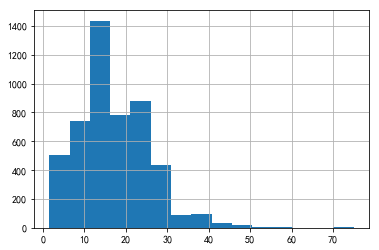

In [77]:
df.avgSalary.hist(bins=15)

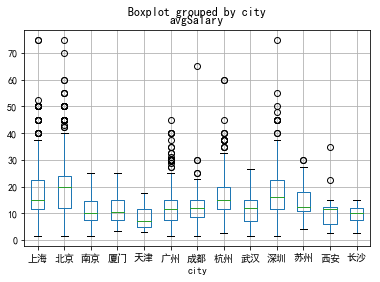

In [78]:
df.boxplot(column='avgSalary', by='city')

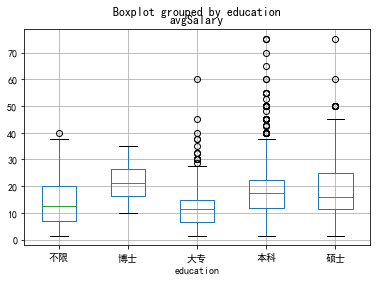

In [79]:
df.boxplot(column='avgSalary', by='education')

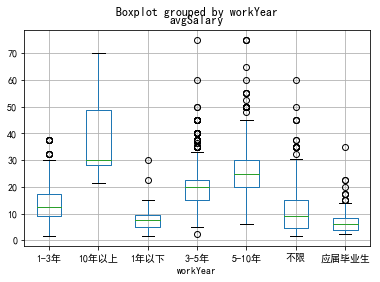

In [80]:
df.boxplot(column='avgSalary', by='workYear')

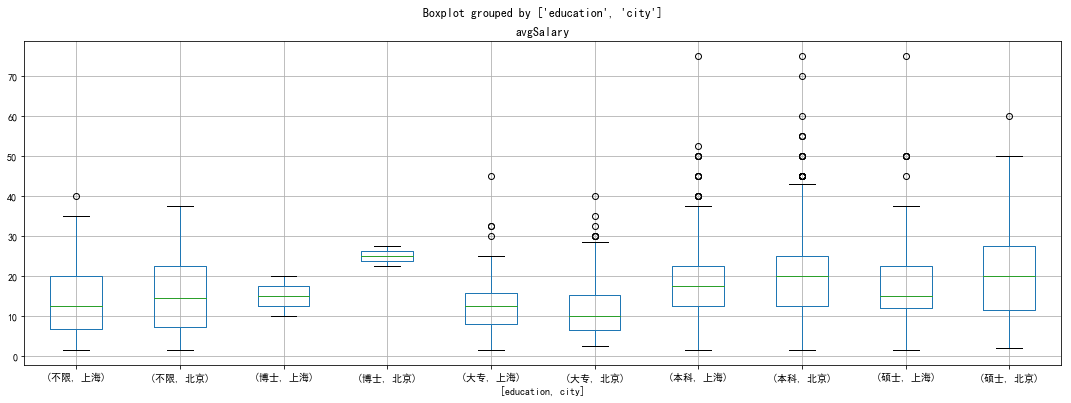

In [81]:
df_bj_sh = df[df['city'].isin(['上海', '北京'])]
df_bj_sh.boxplot(column='avgSalary', by=['education','city'], figsize=(18, 6))

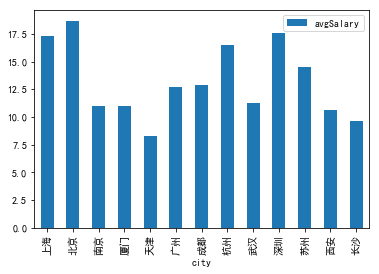

In [82]:
df.groupby('city').mean().plot.bar()

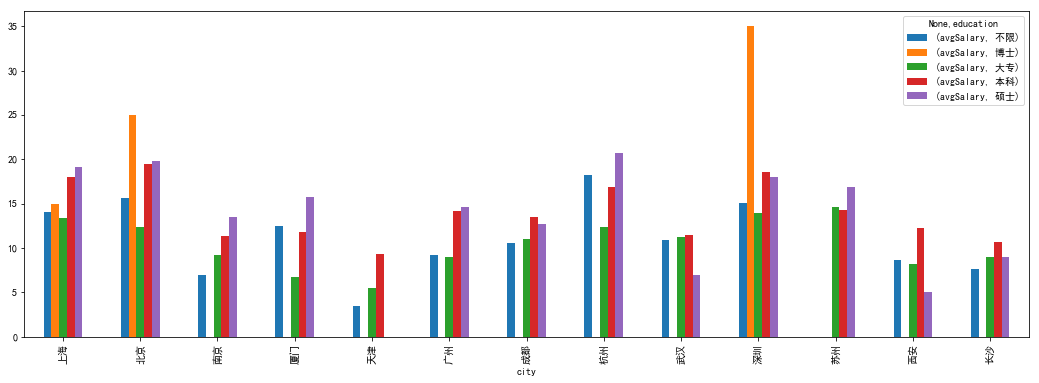

In [83]:
df.groupby(['city', 'education']).mean().unstack().plot.bar(figsize=(18, 6))

In [84]:
# 标签处理
lables = df.positionLables.str[1:-1] # Remove[]
lables = lables.str.replace(' ', '')
lables[:5]

0    '分析师','数据分析','数据挖掘','数据'
1    '分析师','数据分析','数据挖掘','数据'
2           '分析师','数据分析','数据'
3       '商业','分析师','大数据','数据'
4      '分析师','数据分析','数据','BI'
Name: positionLables, dtype: object

In [85]:
df_labels = lables.dropna().str.split(',').apply(pd.value_counts).unstack()
# 不用担心NaN，可以进一步处理。
# df_labels = lables.dropna().str.split(',').apply(pd.value_counts)
df_labels

'数据'  0       1.0
      1       1.0
      2       1.0
      3       1.0
      4       1.0
      5       NaN
      6       1.0
      7       1.0
      8       1.0
      9       1.0
      10      1.0
      11      1.0
      12      1.0
      13      1.0
      14      1.0
      15      1.0
      16      1.0
      17      NaN
      18      NaN
      19      NaN
      20      1.0
      21      NaN
      22      1.0
      23      1.0
      24      1.0
      25      NaN
      26      1.0
      27      1.0
      28      1.0
      29      NaN
             ... 
'专利'  5019    NaN
      5020    NaN
      5021    NaN
      5022    NaN
      5023    NaN
      5024    NaN
      5025    NaN
      5026    NaN
      5027    NaN
      5028    NaN
      5029    NaN
      5030    NaN
      5031    NaN
      5032    NaN
      5033    NaN
      5034    NaN
      5035    NaN
      5036    NaN
      5037    NaN
      5038    NaN
      5039    NaN
      5040    NaN
      5041    NaN
      5042    NaN
      5043

In [86]:
df_labels = df_labels.dropna().reset_index()
df_labels

,level_0,level_1,0
0,'数据',0,1.0
1,'数据',1,1.0
2,'数据',2,1.0
3,'数据',3,1.0
4,'数据',4,1.0
5,'数据',6,1.0
6,'数据',7,1.0
7,'数据',8,1.0
8,'数据',9,1.0
9,'数据',10,1.0


In [87]:
df_labels = df_labels.groupby('level_0').count()
df_labels

,level_1,0
level_0,,
'.NET',6,6
'15天年假',1,1
'Android',1,1
'BD',11,11
'BI',201,201
'B端',1,1
'C',3,3
'C++',8,8
'C/C++',3,3


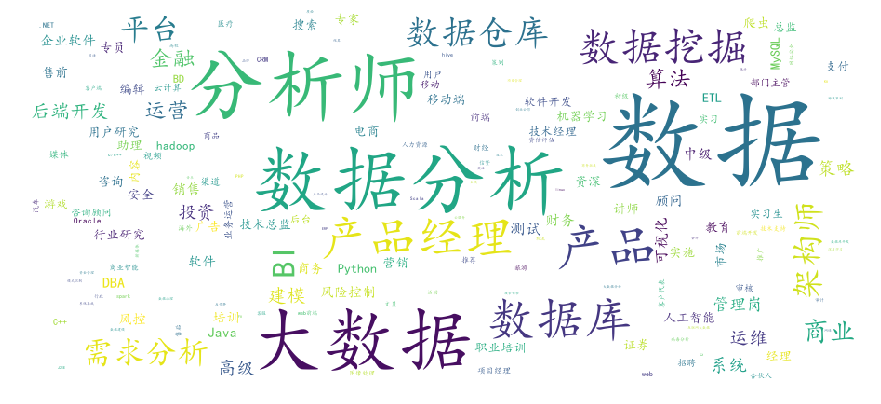

In [88]:
from wordcloud import WordCloud

df_labels.index = df_labels.index.str.replace("'", '')
wc = WordCloud(font_path='simkai.ttf', width=900, height=400, background_color='white')
wc.fit_words(df_labels.level_1)
f, axis = plt.subplots(figsize=(15, 15))
axis = plt.imshow(wc)
plt.axis('off')
plt.show()